## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 7.0 MB/s eta 0:00:0000:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 26.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=3811d0600a6872afe0db086e648112b4e3f93f2699d064fda6a1feb3418e9c5d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d322

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

# Step 2: Authentication for Twitter API

In [22]:
# Authentication
consumerKey = "niS6t9ALsxJtyNwi7MivVwvMc"
consumerSecret = "BLpexNNSYlmFymdh8BzVZdMKj9kgkT4AqazwhbjMm6f35vxpvW"
accessToken = "4635306306-Wj2TClW94sdxGklSAbWecxMOAGQ8Yn6B17rZy8t"
accessTokenSecret = "ZRuyCwU5xjlBkMSKpKpVw3XRK471iXq7gmWdjpazFfDwm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  79


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  79
positive number:  11
negative number:  43
neutral number:  25


In [7]:
tweet_list[0:20]

,0
0,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ..."
1,por mucho la mejor película que ha hecho Mariv...
2,"Sintiéndome un poco calabaza espachurrada, esp..."
3,"RT @Multiverso_GK: Y así cierra, una de las me..."
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
5,Porque los infuencers no pueden calificar #Gua...
6,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...
7,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
8,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


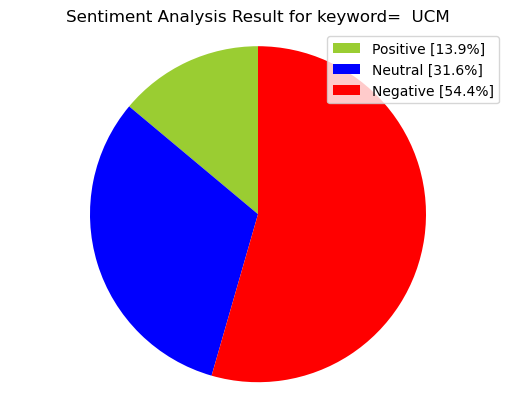

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...","@GabyMeza8 Y hasta ahora, mi favorita del UCM ..."
1,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor película que ha hecho Mariv...
2,"Sintiéndome un poco calabaza espachurrada, esp...","Sintiéndome un poco calabaza espachurrada, esp..."
3,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
5,Porque los infuencers no pueden calificar #Gua...,Porque los infuencers no pueden calificar #Gua...
6,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...
7,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
11,Cómo voy a ponerme a pensar en otras historias...,Cómo voy a ponerme a pensar en otras historias...
12,RT @peterjordan100: Geral falando bem de Guard...,RT @peterjordan100: Geral falando bem de Guard...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...",y hasta ahora mi favorita del ucm es guardi...
1,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor pel cula que ha hecho mariv...
2,"Sintiéndome un poco calabaza espachurrada, esp...",sinti ndome un poco calabaza espachurrada esp...
3,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
5,Porque los infuencers no pueden calificar #Gua...,porque los infuencers no pueden calificar gua...
6,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,el mejor pr logo del ucm
7,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
11,Cómo voy a ponerme a pensar en otras historias...,c mo voy a ponerme a pensar en otras historias...
12,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_11106/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@GabyMeza8 Y hasta ahora, mi favorita del UCM ...",y hasta ahora mi favorita del ucm es guardi...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
1,por mucho la mejor película que ha hecho Mariv...,por mucho la mejor pel cula que ha hecho mariv...,0.0,0.000000,positive,0.000,0.876,0.124,0.3400
2,"Sintiéndome un poco calabaza espachurrada, esp...",sinti ndome un poco calabaza espachurrada esp...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
3,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
5,Porque los infuencers no pueden calificar #Gua...,porque los infuencers no pueden calificar gua...,0.5,0.500000,negative,0.210,0.619,0.171,-0.2023
6,🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠🫠 El mejor prólogo del UCM https:/...,el mejor pr logo del ucm,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
11,Cómo voy a ponerme a pensar en otras historias...,c mo voy a ponerme a pensar en otras historias...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @peterjordan100: Geral falando bem de Guard...,geral falando bem de guardi es da gal xia ge...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,17,60.71
negative,8,28.57
positive,3,10.71


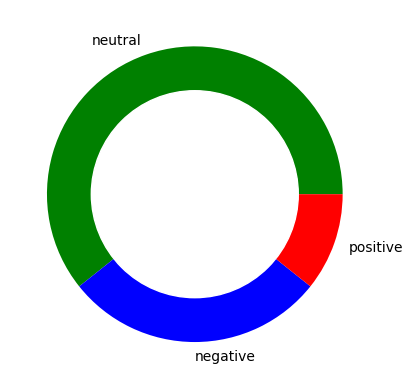

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



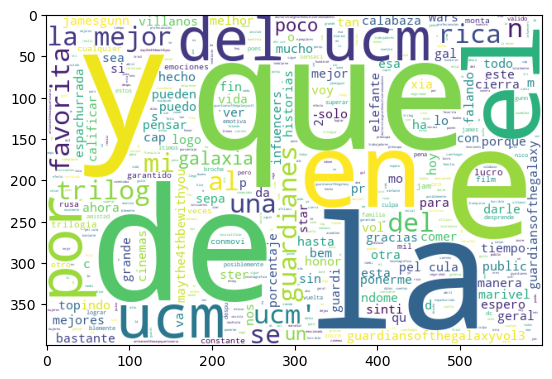

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

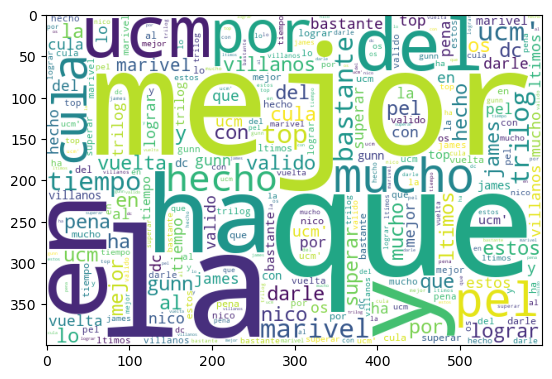

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

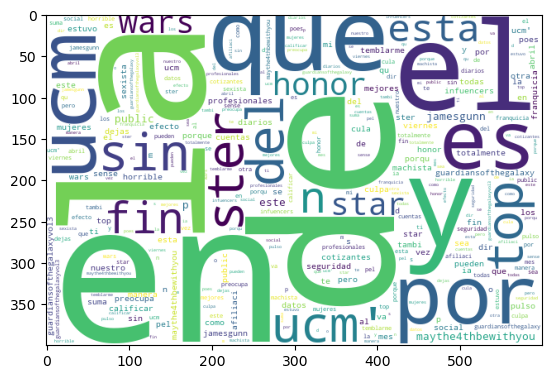

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

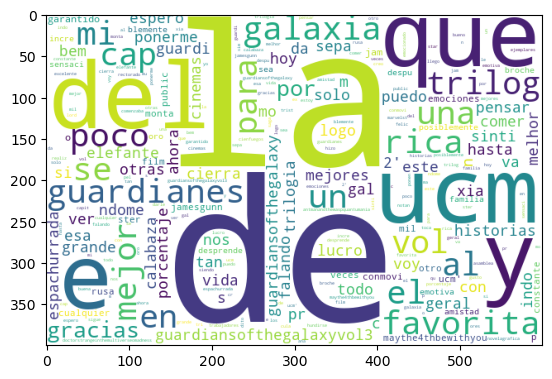

In [21]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)